In [1]:
# Charger le jeu de données MNIST.. 
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

0.943
['2']


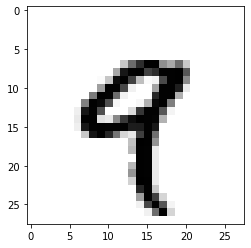

In [26]:
# Diviser la base de données en 49000 lignes pour l’apprentissage (training) et le reste pour les tests. 
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
#  Construire un modèle de classification ayant comme paramètre : hidden_layer_sizes = (50), 
# puis calculez la précession du classifieur ; 

clf = nn.MLPClassifier(hidden_layer_sizes=(50))
clf.fit(xtrain,ytrain)
print(clf.score(xtest, ytest))
# Afficher la classe de l’image 4 et sa classe prédite. 

print(clf.predict([mnist.data[4]]))
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 

In [20]:
# Calculez la précision en utilisant le package : metrics.precision_score(ytest_pr, ypredTest_pr,average='micro').
sklearn.metrics.precision_score(ytest,clf.predict(xtest), average='micro') 

0.9533809523809523

In [3]:
size=10000
data=np.random.randint(70000, size=size)

Precision for nbcouches=2 : 0.8813333333333333
Recall for nbcouches=2 : 0.8805118138619438
Precision for nbcouches=10 : 0.9313333333333333
Recall for nbcouches=10 : 0.9300987006179356
Precision for nbcouches=20 : 0.945
Recall for nbcouches=20 : 0.9446272298363271
Precision for nbcouches=30 : 0.8186666666666667
Recall for nbcouches=30 : 0.8176544992019451
Precision for nbcouches=40 : 0.7486666666666667
Recall for nbcouches=40 : 0.7502973072673519
Precision for nbcouches=50 : 0.11533333333333333
Recall for nbcouches=50 : 0.1
Precision for nbcouches=100 : 0.11533333333333333
Recall for nbcouches=100 : 0.1


Text(0, 0.5, 'Exectime(s)')

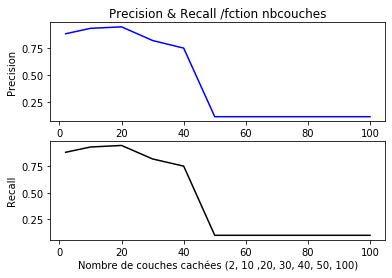

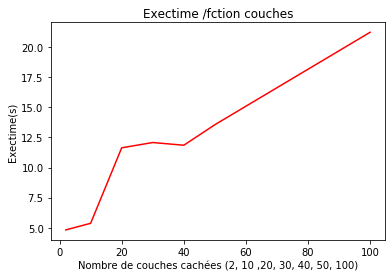

In [2]:
# Varier le nombre de couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur. 
# Sujet modifié : Varier le nombre de couches comme suit : 2 10 20 50 100 couches, avec à chaque fois 50 neurones 
# par couche

xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.7)
score=[]
times=[]

recall=[]
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer)
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    score.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    recall.append(temprecall)
    stop=time.time()
    exectime=stop-start
    times.append(exectime)
    
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot([2,10,20,30,40,50,100],score,c='b')
ax1.set_title("Precision & Recall /fction nbcouches")
ax1.set_ylabel("Precision")

ax2.plot([2,10,20,30,40,50,100],recall,c='k')
ax2.set_xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
ax2.set_ylabel("Recall")

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
ax3.plot([2,10,20,30,40,50,100],times,c='r')
ax3.set_title("Exectime /fction couches")
ax3.set_xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
ax3.set_ylabel("Exectime(s)")

In [3]:
# Construire cinq modèles de classification des données mnist, avec des
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de
# couches entre 10 et 300 neurones au choix d’une façon aléatoire. Quelles
# sont les performances en taux de bonne classification et en temps
# d’apprentissage obtenus pour chaque modèle ? Utilisez la fonction time() du
# package time pour mesurer le temps d’apprentissage d’un modèle.

# Sujet modifié : Deux modèles : un  de 50 couches. Première couche = 60 neurone, couche suivante = nb neurone-1
#                               deuxieme de 20 couches. première couches 60 neurones, couche suivante nb-neurone-2
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.7)
# modèle 1
layers=(60,)
for i in range(10,59):
    layers= layers+((69-i),)
start=time.time()
clf = nn.MLPClassifier(hidden_layer_sizes=layers)
clf.fit(xtrain,ytrain)
tempscore=clf.score(xtest, ytest)
temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
stop=time.time()
print("Precision for modele 1= "+str(tempscore))
print("ExecTime for modele 1= "+str(stop-start))
print("Recall for modele 1= "+str(temprecall)+"\n")

# modèle 2
layers=(60,)
for i in range(11,48,2):
    layers= layers+((69-i),)
start=time.time()
clf = nn.MLPClassifier(hidden_layer_sizes=layers)
clf.fit(xtrain,ytrain)
tempscore=clf.score(xtest, ytest)
temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
stop=time.time()
print("Precision for modele 2= "+str(tempscore))
print("ExecTime for modele 2= "+str(stop-start))
print("Recall for modele 2= "+str(temprecall))

Precision for modele 1= 0.11538095238095238
ExecTime for modele 1= 75.88407301902771
Accuracy for modele 1= 0.11538095238095238
Recall for modele 1= 0.1

Precision for modele 2= 0.967
ExecTime for modele 2= 391.2509071826935
Accuracy for modele 2= 0.967
Recall for modele 2= 0.9667989680801836


With Adam : Training for nbcouches=2
With Adam : Precision for nbcouches=2 : 0.883
With Adam : Recall for nbcouches=2 : 0.8820281639120058
With Adam : Training for nbcouches=10
With Adam : Precision for nbcouches=10 : 0.9453333333333334
With Adam : Recall for nbcouches=10 : 0.9449934076018793
With Adam : Training for nbcouches=20
With Adam : Precision for nbcouches=20 : 0.9373333333333334
With Adam : Recall for nbcouches=20 : 0.9384185674048027
With Adam : Training for nbcouches=30
With Adam : Precision for nbcouches=30 : 0.931
With Adam : Recall for nbcouches=30 : 0.9317202184253629
With Adam : Training for nbcouches=40
With Adam : Precision for nbcouches=40 : 0.6183333333333333
With Adam : Recall for nbcouches=40 : 0.6081207403729716
With Adam : Training for nbcouches=50
With Adam : Precision for nbcouches=50 : 0.11533333333333333
With Adam : Recall for nbcouches=50 : 0.1
With Adam : Training for nbcouches=100
With Adam : Precision for nbcouches=100 : 0.11533333333333333
With Adam : 

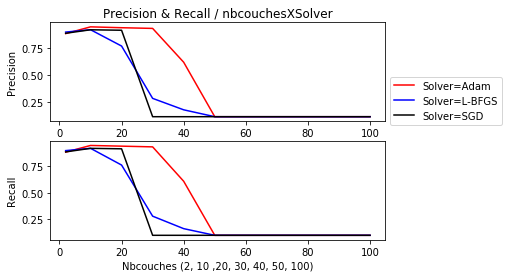

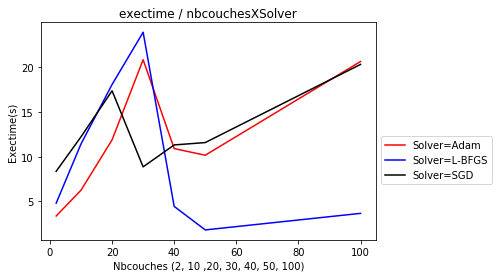

In [3]:
# Etudier la convergence des algorithmes d'optimisation disponibles : L-BFGS, SGD et Adam
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.7)
scoreAdam=[]
scoreLBFGS=[]
scoreSGD=[]
timeAdam=[]
timeLBFGS=[]
timeSGD=[]
RecAdam=[]
RecLBFGS=[]
RecSGD=[]
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='adam')
    print("With Adam : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With Adam : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreAdam.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With Adam : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    RecAdam.append(temprecall)
    stop=time.time()
    temptime=stop-start
    timeAdam.append(temptime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='lbfgs')
    print("With L-BFGS : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With L-BFGS : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreLBFGS.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With L-BFGS : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    RecLBFGS.append(temprecall)
    stop=time.time()
    temptime=stop-start
    timeLBFGS.append(temptime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='sgd')
    print("With SGD : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With SGD : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreSGD.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With SGD : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    RecSGD.append(temprecall)
    stop=time.time()
    temptime=stop-start
    timeSGD.append(temptime)
    
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot([2,10,20,30,40,50,100],scoreAdam,'r',label="Solver=Adam")
ax1.plot([2,10,20,30,40,50,100],scoreLBFGS,'b',label="Solver=L-BFGS")
ax1.plot([2,10,20,30,40,50,100],scoreSGD,'k',label="Solver=SGD")
ax1.set_title("Precision & Recall / nbcouchesXSolver")
ax1.set_ylabel("Precision")
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.plot([2,10,20,30,40,50,100],RecAdam,'r',label="Solver=Adam")
ax2.plot([2,10,20,30,40,50,100],RecLBFGS,'b',label="Solver=L-BFGS")
ax2.plot([2,10,20,30,40,50,100],RecSGD,'k',label="Solver=SGD")
ax2.set_xlabel("Nbcouches (2, 10 ,20, 30, 40, 50, 100)")
ax2.set_ylabel("Recall")

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
ax3.plot([2,10,20,30,40,50,100],timeAdam,'r',label="Solver=Adam")
ax3.plot([2,10,20,30,40,50,100],timeLBFGS,'b',label="Solver=L-BFGS")
ax3.plot([2,10,20,30,40,50,100],timeSGD,'k',label="Solver=SGD")
ax3.set_title("exectime / nbcouchesXSolver")
ax3.set_xlabel("Nbcouches (2, 10 ,20, 30, 40, 50, 100)")
ax3.set_ylabel("Exectime(s)")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))

plt.show()

With identity : Training for nbcouches=2
With identity : Precision for nbcouches=2 : 0.885
With identity : Recall for nbcouches=2 : 0.885116290873912
With identity : Training for nbcouches=10
With identity : Precision for nbcouches=10 : 0.9016666666666666
With identity : Recall for nbcouches=10 : 0.9016238204814234
With identity : Training for nbcouches=20
With identity : Precision for nbcouches=20 : 0.8896666666666667
With identity : Recall for nbcouches=20 : 0.8892105310699631
With identity : Training for nbcouches=30
With identity : Precision for nbcouches=30 : 0.8776666666666667
With identity : Recall for nbcouches=30 : 0.8774429943302812
With identity : Training for nbcouches=40
With identity : Precision for nbcouches=40 : 0.89
With identity : Recall for nbcouches=40 : 0.8891153148480706
With identity : Training for nbcouches=50
With identity : Precision for nbcouches=50 : 0.8833333333333333
With identity : Recall for nbcouches=50 : 0.8836842113843295
With identity : Training for 

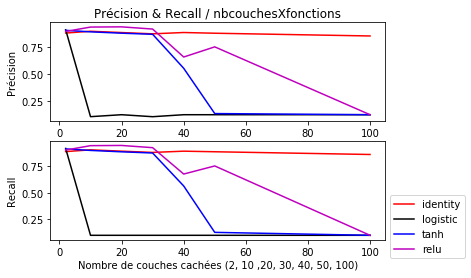

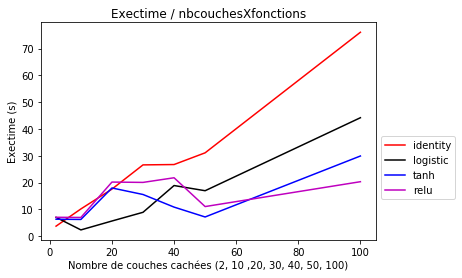

In [4]:
# Varier les fonctions d'activation : identity, logistic, tanh, relu
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.7)
scoreidentity=[]
scorelogistic=[]
scoretanh=[]
scorerelu=[]
timeidentity=[]
timelogistic=[]
timetanh=[]
timerelu=[]
Recidentity=[]
Reclogistic=[]
Rectanh=[]
Recrelu=[]
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='identity')
    print("With identity : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With identity : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreidentity.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With identity : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    Recidentity.append(temprecall)
    stop=time.time()
    exectime=stop-start
    timeidentity.append(exectime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='logistic')
    print("With logistic : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With logistic : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scorelogistic.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With logistic : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    Reclogistic.append(temprecall)
    stop=time.time()
    exectime=stop-start
    timelogistic.append(exectime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='tanh')
    print("With tanh : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With tanh : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoretanh.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With tanh : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    Rectanh.append(temprecall)
    stop=time.time()
    exectime=stop-start
    timetanh.append(exectime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='relu')
    print("With relu : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With relu : Precision for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scorerelu.append(tempscore)
    temprecall=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    print("With relu : Recall for nbcouches="+str(nbcouches)+" : "+str(temprecall))
    Recrelu.append(temprecall)
    stop=time.time()
    exectime=stop-start
    timerelu.append(exectime)
    

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot([2,10,20,30,40,50,100],scoreidentity,'r',label="identity")
ax1.plot([2,10,20,30,40,50,100],scorelogistic,'k',label="logistic")
ax1.plot([2,10,20,30,40,50,100],scoretanh,'b',label="tanh")
ax1.plot([2,10,20,30,40,50,100],scorerelu,'m',label="relu")
ax1.set_title("Précision & Recall / nbcouchesXfonctions")
ax1.set_ylabel("Précision")

ax2.plot([2,10,20,30,40,50,100],Recidentity,'r',label="identity")
ax2.plot([2,10,20,30,40,50,100],Reclogistic,'k',label="logistic")
ax2.plot([2,10,20,30,40,50,100],Rectanh,'b',label="tanh")
ax2.plot([2,10,20,30,40,50,100],Recrelu,'m',label="relu")
ax2.set_xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
ax2.set_ylabel("Recall")
ax2.legend(loc='upper left',bbox_to_anchor=(1,0.5))

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
ax3.plot([2,10,20,30,40,50,100],timeidentity,'r',label="identity")
ax3.plot([2,10,20,30,40,50,100],timelogistic,'k',label="logistic")
ax3.plot([2,10,20,30,40,50,100],timetanh,'b',label="tanh")
ax3.plot([2,10,20,30,40,50,100],timerelu,'m',label="relu")
ax3.set_title("Exectime / nbcouchesXfonctions")
ax3.set_xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
ax3.set_ylabel("Exectime (s)")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))


In [ ]:
##### Overfitting : en classifiant toutes les valeurs et en cherchant à optimiser le taux de réussite, on prend
# en compte un "bruit" lors de la classification. En d'autres termes, on arrivera peut etre à un bon taux de
# réussite sur les tests, mais la précision ne sera pas forcément bonne. Une fonction pour contrer cet overfittig
# est employée par défaut, avec un paramètre la modulant (alpha). Par défaut dans les tests précédents on a 
# alpha très proche de 0, on ne contre pas l'overfitting au profit du taux de réussite mais au détriment
# de la précision. En agissant dessus, on aura peut etre un taux de réussite plus bas, mais notre modèle sera 
# plus précis.



With alpha = 1e-05 : PrecisionTest=0.929
With alpha = 1e-05 : PrecisionTrain=0.9898571428571429
With alpha = 1e-05 : recall=0.9290840211172234
With alpha = 0.001 : PrecisionTest=0.939
With alpha = 0.001 : PrecisionTrain=0.9944285714285714
With alpha = 0.001 : recall=0.938491843723645
With alpha = 0.1 : PrecisionTest=0.9216666666666666
With alpha = 0.1 : PrecisionTrain=0.9827142857142858
With alpha = 0.1 : recall=0.9240425416460895
With alpha = 10 : PrecisionTest=0.863
With alpha = 10 : PrecisionTrain=0.9402857142857143
With alpha = 10 : recall=0.8628278833797143
With alpha = 100 : PrecisionTest=0.10233333333333333
With alpha = 100 : PrecisionTrain=0.11985714285714286
With alpha = 100 : recall=0.1
With alpha = 1000 : PrecisionTest=0.10233333333333333
With alpha = 1000 : PrecisionTrain=0.11985714285714286
With alpha = 1000 : recall=0.1


Text(0, 0.5, 'Exectime(s)')

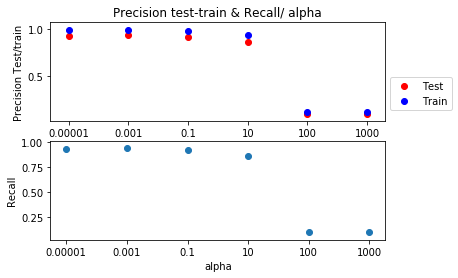

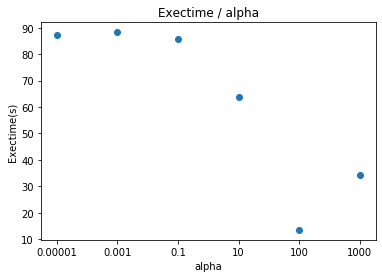

In [5]:
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.7)
nbcouches=20
layer= (50,)*nbcouches
scoreTest=[]
scoreTrain=[]
times=[]
Rec=[]
for alpha in (0.00001,0.001,0.1,10,100,1000):
    start=time.time()
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,alpha=alpha)
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    scoreTest.append(tempscore)
    print("With alpha = "+str(alpha)+" : PrecisionTest="+str(tempscore))
    tempscore=clf.score(xtrain, ytrain)
    scoreTrain.append(tempscore)
    print("With alpha = "+str(alpha)+" : PrecisionTrain="+str(tempscore))
    temprec=metrics.recall_score(ytest,clf.predict(xtest),average='macro')
    Rec.append(temprec)
    print("With alpha = "+str(alpha)+" : recall="+str(temprec))
    stop=time.time()
    length=stop-start
    times.append(length)
    

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('0.00001','0.001','0.1','10','100','1000'),scoreTest,c='r',label='Test')
ax1.set_title("Precision test-train & Recall/ alpha")
ax1.set_ylabel("Precision Test/train")
ax1.scatter(('0.00001','0.001','0.1','10','100','1000'),scoreTrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('0.00001','0.001','0.1','10','100','1000'),Rec,c='b')
ax2.set_xlabel("alpha")
ax2.set_ylabel("Recall")

fig2, (ax3) = plt.subplots(nrows=1, ncols=1)
ax3.scatter(('0.00001','0.001','0.1','10','100','1000'),times)
ax3.set_title("Exectime / alpha")
ax3.set_xlabel("alpha")
ax3.set_ylabel("Exectime(s)")
